# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
model = LinearRegression()

In [3]:
##### Your Code Here #####


In [5]:
y = df["price"]
x = df["zipcode"]
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.5, random_state = 42)
X_train = np.array(X_train).reshape(-1,1)
m1 = model.fit(X_train, Y_train)

y_test_prediction = model.predict((np.array(X_test).reshape(-1,1)))
MSE = mean_squared_error(Y_test, y_test_prediction)
RMSE = np.sqrt(mean_squared_error(Y_test, y_test_prediction))
R2 = r2_score(Y_test, y_test_prediction)
MSE,RMSE,R2

(148619782534.57547, 385512.3636598124, 0.0022319275789535187)

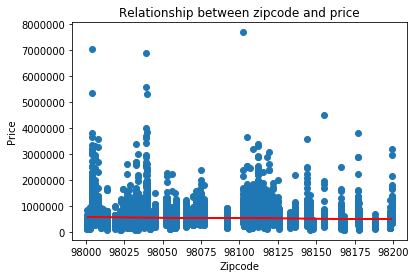

In [6]:
slope = m1.coef_[0]
b = m1.intercept_
line =[ slope*x + b for x in X_test]

plt.scatter(X_test, Y_test)
plt.plot(X_test,line, color = 'r')
plt.ylabel("Price")
plt.xlabel("Zipcode")
plt.title("Relationship between zipcode and price")
plt.show()

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [7]:
##### Your Code Here #####
y = df["price"]
x = df[["bedrooms","sqft_lot"]]
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.5)

m1 = model.fit(X_train, Y_train)

y_test_prediction = model.predict(X_test)
MSE = mean_squared_error(Y_test, y_test_prediction)
RMSE = np.sqrt(mean_squared_error(Y_test, y_test_prediction))
R2 = r2_score(Y_test, y_test_prediction)
MSE,RMSE,R2

(118183523923.11678, 343778.306359079, 0.11098252370517858)

In [8]:
X_train

,bedrooms,sqft_lot
15030,3,10018
11402,4,15929
8706,3,7210
15677,3,5600
4622,3,3210
5534,4,3740
18005,4,9547
4351,3,1599
18857,5,5280
5793,3,86636


# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [9]:
##### Your Code Here #####
y = df["price"]
x = df.drop(["price","id","date"],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.5)

m1 = model.fit(X_train, Y_train)

y_test_prediction = model.predict(X_test)
MSE = mean_squared_error(Y_test, y_test_prediction)
RMSE = MSE**0.5
R2 = r2_score(Y_test, y_test_prediction)
MSE, RMSE, R2

(42801761125.298004, 206885.86497220636, 0.6905112339492967)

# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- Write a blog post explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)


In [10]:
df_zip = pd.get_dummies(df['zipcode'])

In [11]:
df1 = pd.concat([df,df_zip],axis=1 )

In [12]:
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
y = df1["price"]
df1 = pd.concat([df,df_zip],axis=1 )
x = df1.drop(["zipcode","price","id","date"],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.5)

m1 = model.fit(X_train, Y_train)

y_test_prediction = model.predict(X_test)
MSE = mean_squared_error(Y_test, y_test_prediction)
RMSE = MSE**0.5
R2 = r2_score(Y_test, y_test_prediction)
MSE, RMSE, R2

(25092055222.70847, 158404.71969833624, 0.8068305801130705)

In [15]:
y = df1["price"]
df1 = pd.concat([df,df_zip],axis=1 )
x = df1.drop(["zipcode","price","id","date","lat","long"],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.5)

m1 = model.fit(X_train, Y_train)

y_test_prediction = model.predict(X_test)
MSE = mean_squared_error(Y_test, y_test_prediction)
RMSE = MSE**0.5
R2 = r2_score(Y_test, y_test_prediction)
MSE, RMSE, R2

(25707690510.955162, 160336.1796693284, 0.806248850897312)

In [16]:
y = np.log(df1["price"])
df1 = pd.concat([df,df_zip],axis=1 )
x = df1.drop(["zipcode","price","id","date","lat","long"],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.5)

m1 = model.fit(X_train, Y_train)

y_test_prediction = model.predict(X_test)
MSE = mean_squared_error(Y_test, y_test_prediction)
RMSE = MSE**0.5
R2 = r2_score(Y_test, y_test_prediction)
MSE, RMSE, R2

(0.034315060517083544, 0.185243246886583, 0.8781094564331134)

In [17]:
y = np.log(df1["price"])
df1 = pd.concat([df,df_zip],axis=1 )
x = df1.drop(["zipcode","price","id","date","lat","long","yr_built"],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.5)

m1 = model.fit(X_train, Y_train)

y_test_prediction = model.predict(X_test)
MSE = mean_squared_error(Y_test, y_test_prediction)
RMSE = MSE**0.5
R2 = r2_score(Y_test, y_test_prediction)
MSE, RMSE, R2

(0.03407674931625275, 0.18459888763546964, 0.8786314341021148)

In [18]:
df1 = pd.concat([df,df_zip],axis=1 )
df1["has_basement"] = df1["sqft_basement"].apply(lambda x: 1 if x >0 else 0)
x = df1.drop(["zipcode","price","id","date","lat","long","yr_built","sqft_basement"],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.5)

m1 = model.fit(X_train, Y_train)

y_test_prediction = model.predict(X_test)
MSE = mean_squared_error(Y_test, y_test_prediction)
RMSE = MSE**0.5
R2 = r2_score(Y_test, y_test_prediction)
MSE, RMSE, R2

(0.03504823643843739, 0.18721174225576073, 0.8750296378251091)

In [20]:
df1 = pd.concat([df,df_zip],axis=1 )
df1["has_basement"] = df1["sqft_basement"].apply(lambda x: 1 if x >0 else 0)
df1["sqft_lot"] = df1["sqft_lot"].apply(np.sqrt)

x = df1.drop(["zipcode","price","id","date","lat","long","yr_built","sqft_basement"],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.5)

m1 = model.fit(X_train, Y_train)

y_test_prediction = model.predict(X_test)
MSE = mean_squared_error(Y_test, y_test_prediction)
RMSE = MSE**0.5
R2 = r2_score(Y_test, y_test_prediction)
MSE, RMSE, R2

(0.034010075138639934, 0.18441820717770774, 0.8781550169394804)

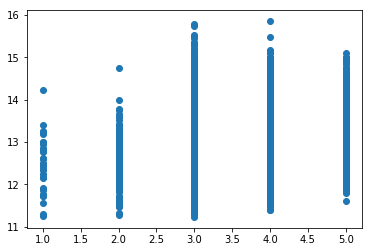

In [21]:
plt.scatter(df["condition"],y)